<a href="https://colab.research.google.com/github/tanaymukherjee/Useful-Python-libraries-for-Data-Science/blob/master/Useful_Python_libraries_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Useful Python libraries for Data Science

In [1]:
# Import basic libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Mounting google colab with personal GDrive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Checking the content in my GDrive witihin the working directory

!ls -ahl "/content/gdrive/My Drive/Colab Notebooks/Data"

total 34M
-rw------- 1 root root 128K Jul 31 02:48 baby1.png
-rw------- 1 root root 902K Jul 21 07:43 clean-support-call.wav
-rw------- 1 root root 3.5K Aug  7 01:04 Delivery_Volume.csv
-rw------- 1 root root  30M Jul 18 04:35 fake_or_real_news.csv
-rw------- 1 root root 653K Jul 21 07:28 good-afternoon.wav
-rw------- 1 root root 489K Jul 21 06:33 good-morning.wav
-rw------- 1 root root 549K Jul 31 03:41 haarcascade_frontalface_alt2.xml.txt
drwx------ 2 root root 4.0K Aug 31 21:37 house_prices
-rw------- 1 root root 291K May 31 02:02 Index2018.csv
drwx------ 2 root root 4.0K Aug 31 21:12 nifty
-rw------- 1 root root 164K May 31 02:02 RandWalk.csv
-rw------- 1 root root 492K Jun 16 22:51 spam.csv
drwx------ 2 root root 4.0K Aug 31 21:37 titanic
-rw------- 1 root root 1.1M Jun 16 03:45 tweets.csv
drwx------ 2 root root 4.0K Aug 31 21:08 twitter


## 1. dabl(Data Analysis Baseline Library)

In [4]:
# Installing and loading the library
!pip install dabl

import dabl

### 1.1 Automated Preprocessing with dabl

As part of the preprocessing, dabl will attempt to identify missing values, feature types and erroneous data. if the detection of semantic types (continuous, categorical, ordinal, text, etc) fails, the user can provide type_hints. Let's demo the library with the help of the titanic dataset.

In [5]:
titanic_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/titanic/train.csv')

In [6]:
# A first look at data
titanic_df.shape

(891, 12)

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_df_clean = dabl.clean(titanic_df, verbose=1)

Detected feature types:
2 float, 5 int, 5 object, 0 date, 0 other
Interpreted as:
continuous      2
dirty_float     0
low_card_int    2
categorical     4
date            0
free_string     3
useless         1
dtype: int64


In [9]:
types = dabl.detect_types(titanic_df_clean)
print(types) 

          continuous  dirty_float  low_card_int  ...   date  free_string  useless
Survived       False        False         False  ...  False        False    False
Pclass         False        False         False  ...  False        False    False
Name           False        False         False  ...  False         True    False
Sex            False        False         False  ...  False        False    False
Age             True        False         False  ...  False        False    False
SibSp          False        False          True  ...  False        False    False
Parch          False        False          True  ...  False        False    False
Ticket         False        False         False  ...  False         True    False
Fare            True        False         False  ...  False        False    False
Cabin          False        False         False  ...  False         True    False
Embarked       False        False         False  ...  False        False    False

[11 rows x 7 co

### 1.2 Exploratory Data analysis with dabl

dabl provides a high-level interface that summarizes several common high-level plots. For low dimensional datasets, all features are shown; for high dimensional datasets, only the most informative features for the given task are shown

Initial Model Building with dabl We can find an initial model for our data. The SimpleClassifier implements the familiar scikit-learn API of fit and predict.

Target looks like classification
Linear Discriminant Analysis training set score: 0.589


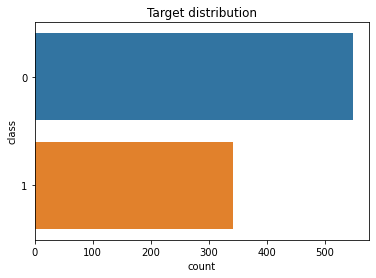

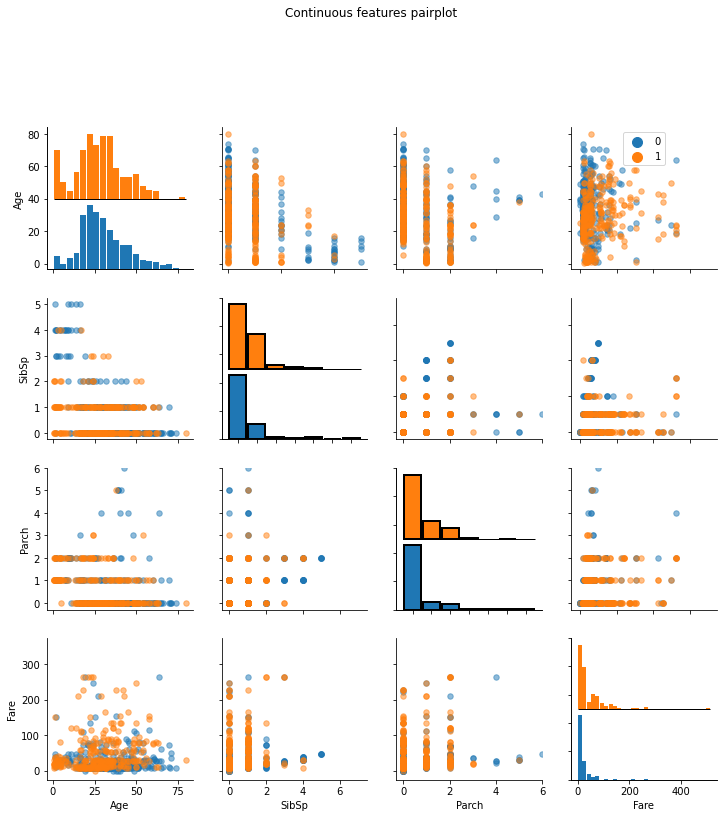

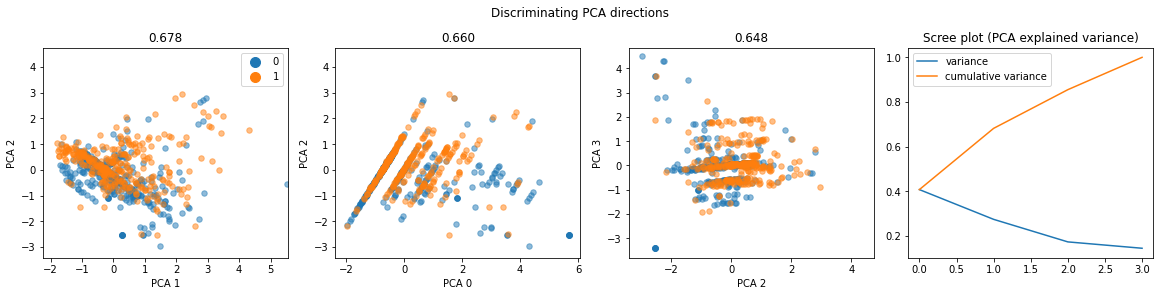

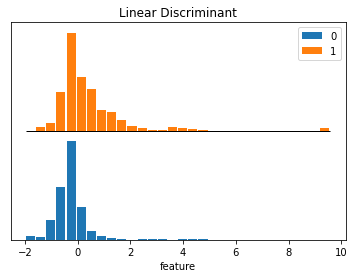

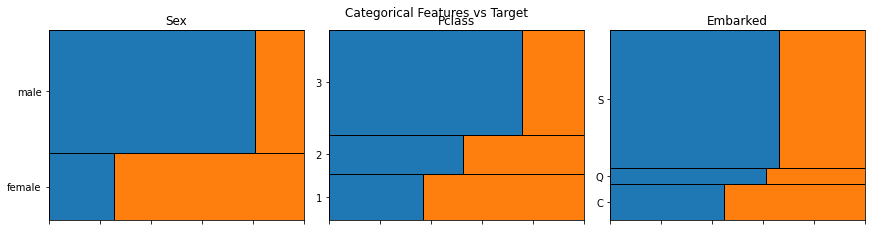

In [10]:
dabl.plot(titanic_df, target_col="Survived")

In [11]:
ec = dabl.SimpleClassifier(random_state=0).fit(titanic_df, target_col="Survived") 

Running DummyClassifier(strategy='prior')
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381

Running GaussianNB()
accuracy: 0.424 average_precision: 0.737 roc_auc: 0.827 recall_macro: 0.529 f1_macro: 0.354
=== new best GaussianNB() (using recall_macro):
accuracy: 0.424 average_precision: 0.737 roc_auc: 0.827 recall_macro: 0.529 f1_macro: 0.354

Running MultinomialNB()
accuracy: 0.763 average_precision: 0.783 roc_auc: 0.831 recall_macro: 0.742 f1_macro: 0.746
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.763 average_precision: 0.783 roc_auc: 0.831 recall_macro: 0.742 f1_macro: 0.746

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.787 average_precision: 0.632 roc_auc: 0.767 recall_macro: 0.767 f1_macro: 0.771
=== new best DecisionTreeClas

The SimpleClassifier first tries several baseline and instantaneous models, potentially on subsampled data, to get an idea of what a low baseline should be.

## 2. missingno

Data in real life is messy and missingno helps us to deal with missing values in a dataset with the help of visualisations. With over 2k stars on github, this library is already very popular.

In [12]:
# installation and importing the library
!pip install missingno
import missingno as msno

In [13]:
# Let's check out the missing values first with the train.info() method
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


clearly, the Age, Cabin and the Embarked column have missing values. Now lets use missingno to visualise this information.

### 2.1 Matrix

The matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

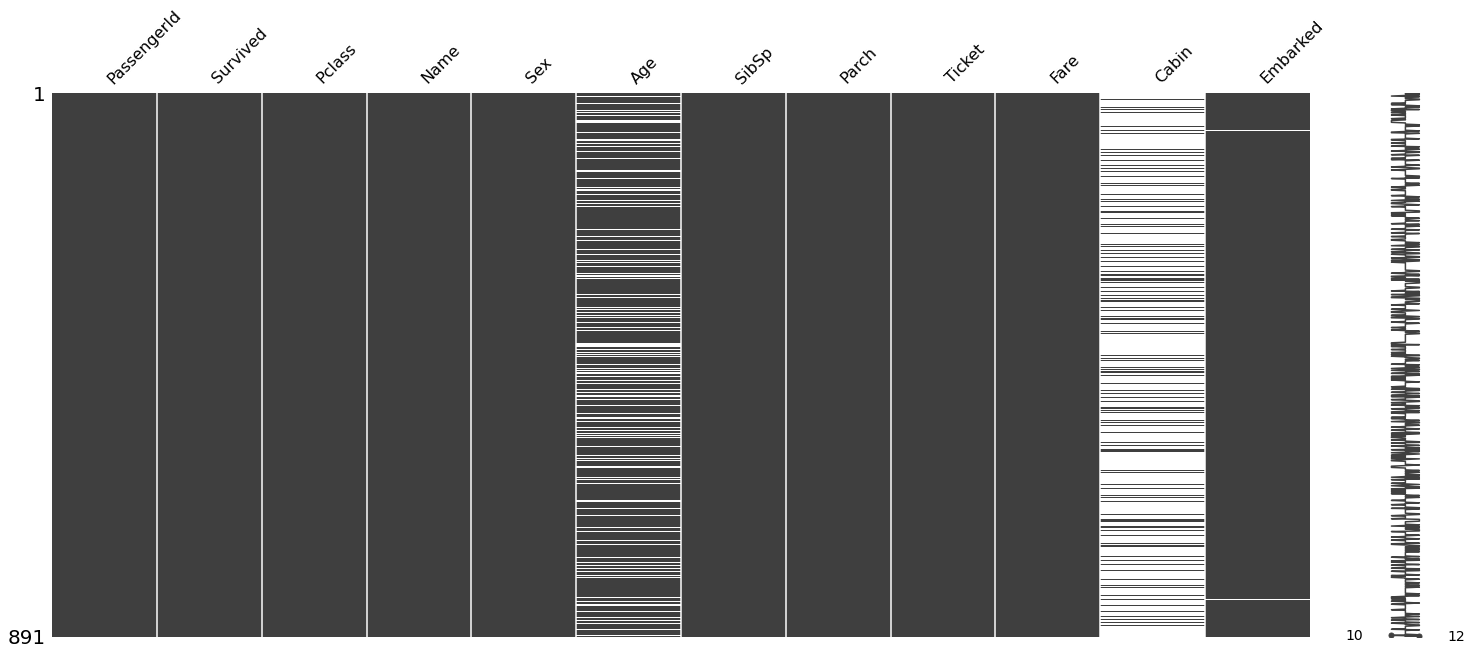

In [14]:
msno.matrix(titanic_df)

We can clearly see that Cabin indeed has a lot of missing values. There is also a bar chart on the right.It summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

We can also sample the data to only show few data points.

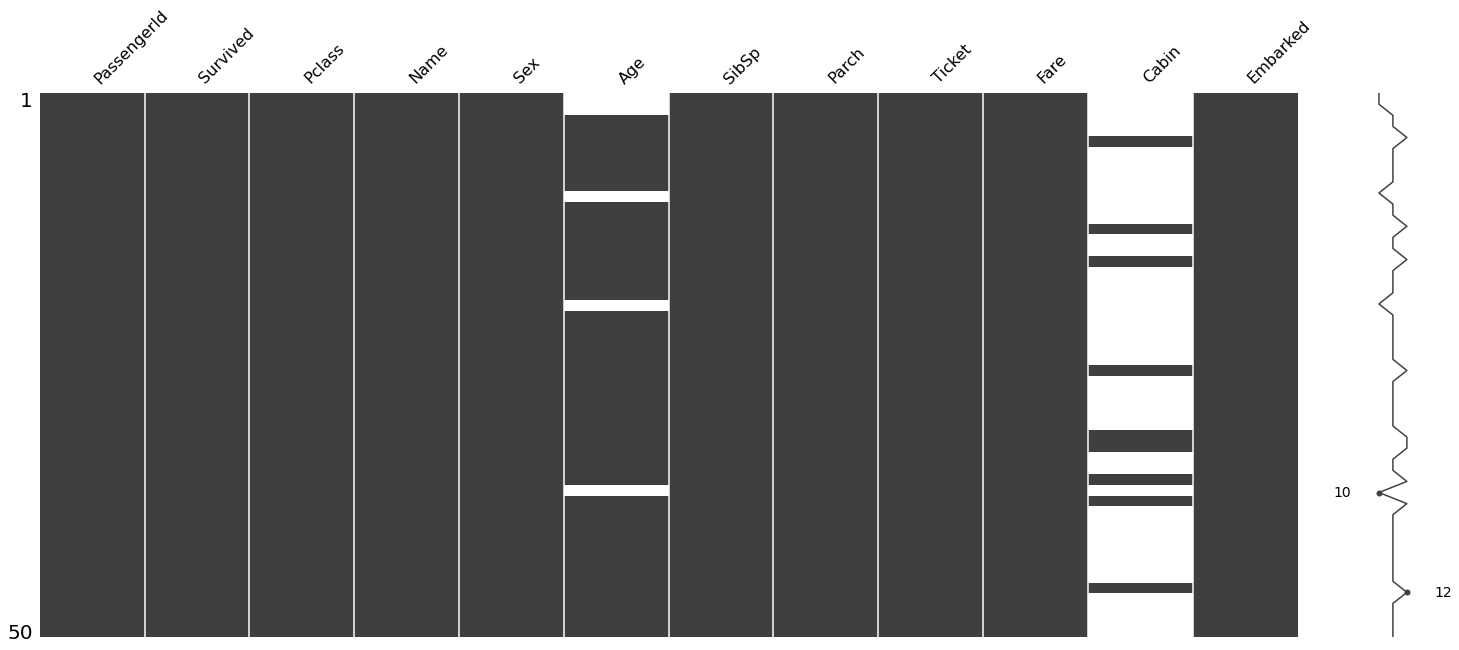

In [15]:
msno.matrix(titanic_df.sample(50))

This shows for the first 50 data points, the Embarked column has no missing value.

### 2.2 Bar Chart

Alternatively, you can also plot a barchart to show the missing values

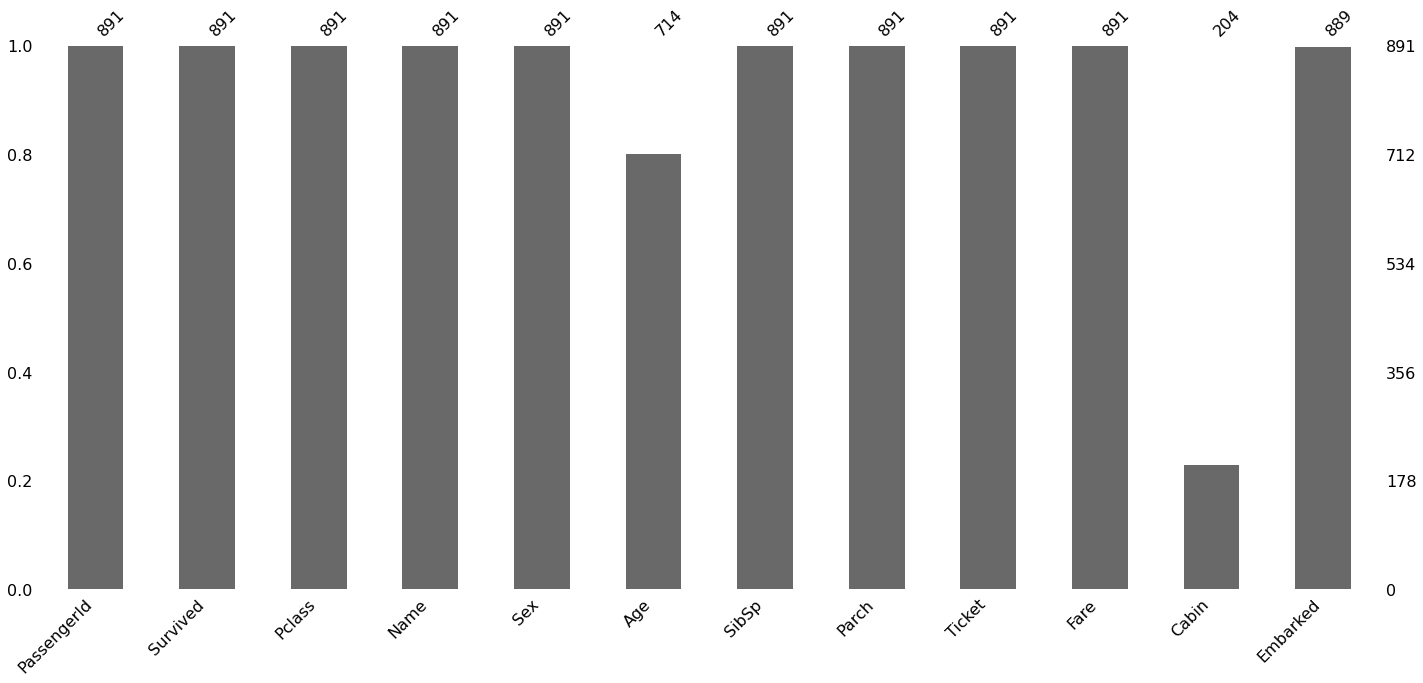

In [16]:
msno.bar(titanic_df)

### 2.3 Heatmap

missingno.heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

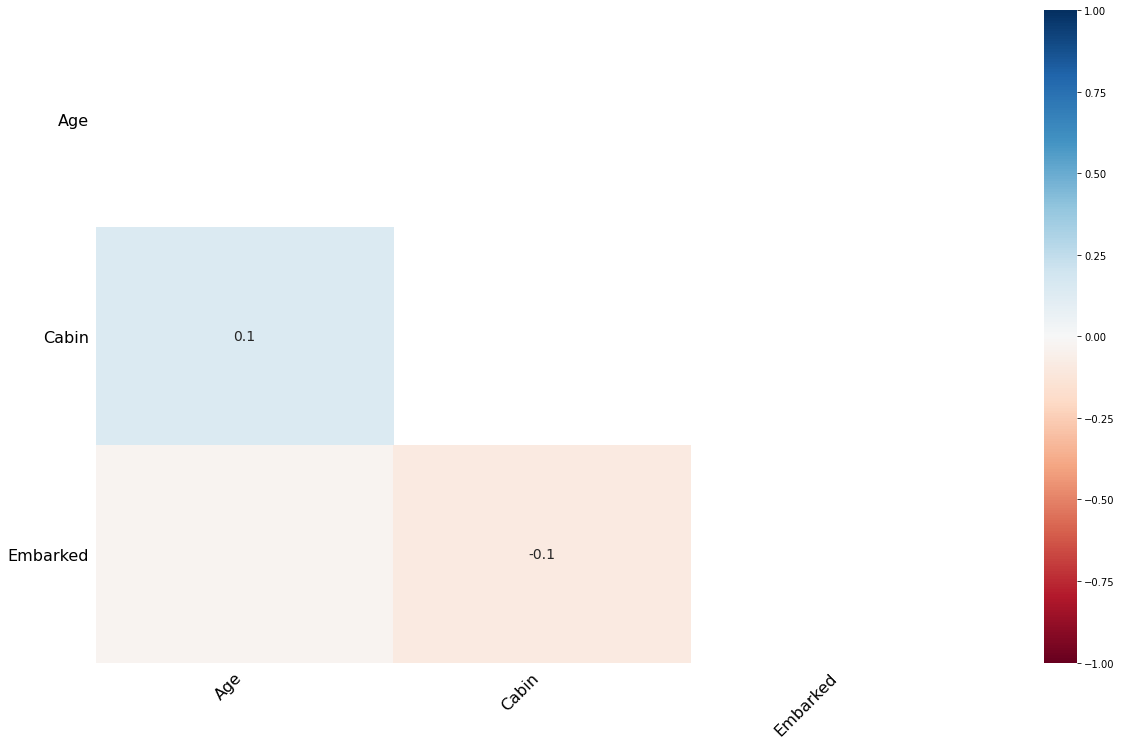

In [17]:
msno.heatmap(titanic_df)

## 3. Emot

Emot is an Emoji and Emoticons detection package for Python. It can come in real handy when we have to preprocess our text data to get rid of the emoticons.

In [18]:
# installation and importing the library
!pip install emot
import emot

In [19]:
text = "The weather is ☁️, we might need to carry our ☂️ :("
emot.emoji(text)

{'flag': True,
 'location': [[15, 15], [46, 46]],
 'mean': [':cloud:', ':umbrella:'],
 'value': ['☁', '☂']}

In [20]:
emot.emoticons(text)

{'flag': True,
 'location': [[49, 51]],
 'mean': ['Frown, sad, andry or pouting'],
 'value': [':(']}

## 4. Flashtext

Flastext lets you extract Keywords from sentence or Replace keywords in sentences.It is based on the FlashText algorithm and is considerably faster than Regular Expressions for NLP tasks.

In [21]:
# installation and importing the library
!pip install flashtext
from flashtext import KeywordProcessor

The dataset is from the competition : Real or Not? NLP with Disaster Tweets where our job is to create a ML model to predict whether the test set tweets belong to a disaster or not, in the form of 1 or 0.This is a classic case of a Binary Classification problem.

In [22]:
twitter_df =  pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/twitter/train.csv')
twitter_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Lets create a corpus of all the tweets in the training set

In [23]:
corpus = ', '.join(twitter_df.text)
corpus[:1000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, Forest fire near La Ronge Sask. Canada, All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected, 13,000 people receive #wildfires evacuation orders in California , Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school , #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires, #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas, I'm on top of the hill and I can see a fire in the woods..., There's an emergency evacuation happening now in the building across the street, I'm afraid that the tornado is coming to our area..., Three people died from the heat wave so far, Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding, #raining #flood

### 4.1 Extract Keywords or searching for words in a corpus

In [24]:
# How many times does the word 'flood' appear in the corpus?
processor = KeywordProcessor()
processor.add_keyword('flood')
found = processor.extract_keywords(corpus)
print(len(found))

58


### 4.2 Replacing words in a text document

In [25]:
# Replacing all occurences of word 'forest fire'(case insensitive) with fire

processor = KeywordProcessor(case_sensitive = False)
processor.add_keyword('forest fire','fire')
found = processor.replace_keywords(corpus)
print(found[:100])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, fire near La Ronge Sask. Cana


The word Forest Fire gets replaced with only fire. In the same way we could also replace special characters, hyperlinks etc from a document.

## 5. PyFlux

Time series analysis is one of the most frequently encountered problems in the Machine learning domain. PyFlux is an open source library in Python explicitly built for working with time series problems. The library has an excellent array of modern time series models including but not limited to ARIMA, GARCH, and VAR models. In short, PyFlux offers a probabilistic approach to time series modeling. Worth trying out.

To see how this library works, I'll be using the NIFTY-50 Stock Market Data (2000-2019) dataset. The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. Let's use just stocks of just one company.

In [26]:
# installing and importing the library
!pip install pyflux

import pyflux as pf

In [27]:
maruti = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data/nifty/datasets_423609_1388435_MARUTI.csv")
# Convert string to datetime64
maruti ['Date'] = maruti ['Date'].apply(pd.to_datetime)

### 5.1 Visualise the data

In [28]:
maruti_df = maruti[['Date','VWAP']]

#Set Date column as the index column.
maruti_df.set_index('Date', inplace=True)
maruti_df.head()

,VWAP
Date,
2003-07-09,165.95
2003-07-10,166.74
2003-07-11,172.45
2003-07-14,177.91
2003-07-15,176.88


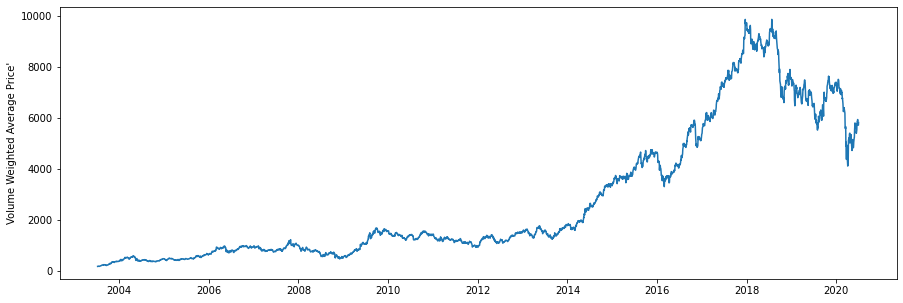

In [29]:
plt.figure(figsize=(15, 5))
plt.ylabel("Volume Weighted Average Price'")
plt.plot(maruti_df)

### 5.2 Modelling

Let's run an ARIMA Model. We can build an ARIMA model as follows, specifying the order of model we want, as well as a pandas DataFrame or numpy array carrying the data.

In [30]:
!pip install pandas==0.25.1

In [31]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as pyplot

Index    Latent Variable           Prior           Prior Hyperparameters     V.I. Dist  Transform 
======== ========================= =============== ========================= ========== ==========
0        Constant                  Normal          mu0: 0, sigma0: 3         Normal     None      
1        AR(1)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
2        AR(2)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
3        AR(3)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
4        AR(4)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
5        MA(1)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
6        MA(2)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
7        MA(3)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
8        M

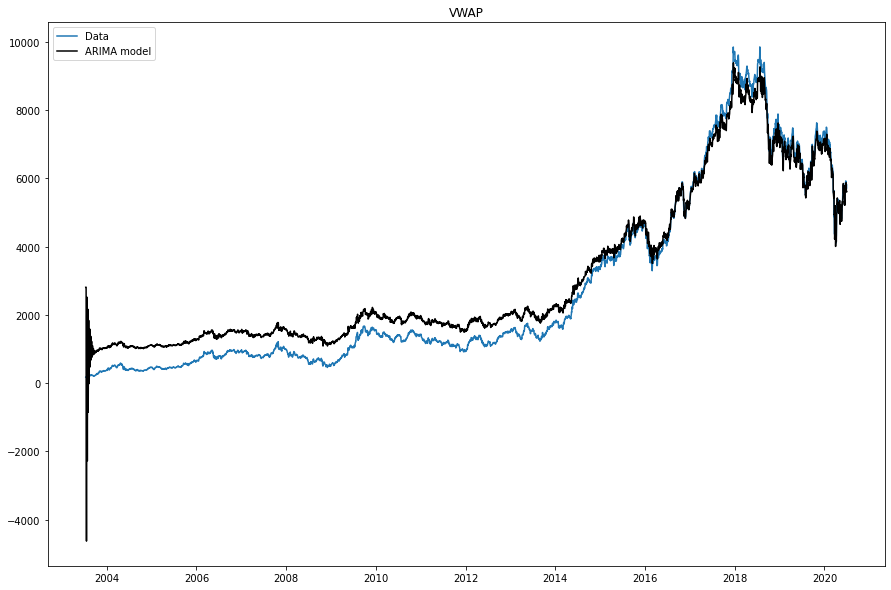

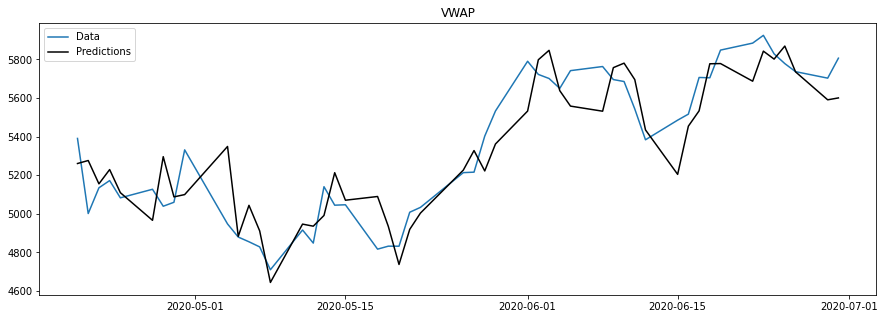

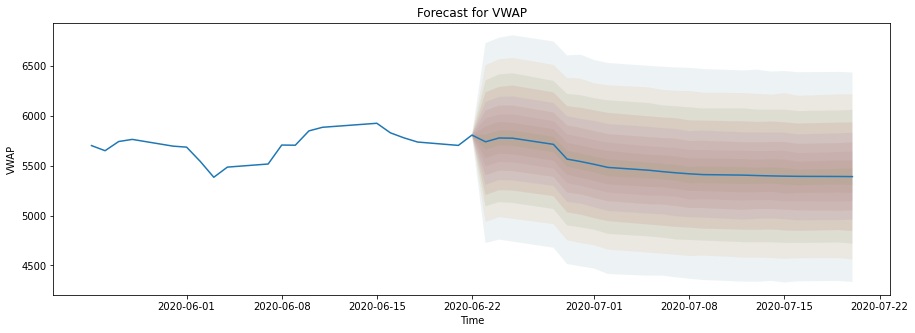

In [32]:
my_model = pf.ARIMA(data=maruti_df, ar=4, ma=4, family=pf.Normal())
print(my_model.latent_variables)

result = my_model.fit("MLE")
result.summary()

# my_model.plot_z(figsize=(15,5))
my_model.plot_fit(figsize=(15,10))
my_model.plot_predict_is(h=50, figsize=(15,5))
my_model.plot_predict(h=20,past_values=20,figsize=(15,5))

## 6. Bamboolib

bamboolib is a GUI for data exploration & transformation in Python Pandas. It is compatible with Jupyter Notebook and JupyterLab. Bamboolib is an otherwise closed source library but can be used for free for open data via Binder or Kaggle.

In [33]:
# installing and importing the library

#!pip install --upgrade bamboolib>=1.2.1

After the installation, which takes some time,reload this browser page (don't press the Restart Session button).

Try installing this library in a new kernel where it works fine(https://www.kaggle.com/tkrabel/bamboolib-titanic-df-wrangling/). It shows some error in this current kernel.

In [34]:
# Importing the necessary libraries 
#import bamboolib as bam
#bam.enable()


#Importing the training dataset
#df = pd.read_csv('../input/titanic/train.csv')
#df

Import the Titanic dataset( or any other depending on your choice)

On running the above cell, magic bamboolib button appears that looks like the image below:
![](https://cdn-images-1.medium.com/max/800/1*cviqH-lxhV1jSZbfbTFojg.png)

Click on the green `Show Bamboolib UI` button to see the various available options in the bamboolib library.


Some of the available features are:

### 6.1 Interactive UI


Interact with the pandas dataframe easily by scrolling and selecting, with a number of options.

![](https://cdn-images-1.medium.com/max/800/1*CwhOsrH-6P_5tyJ5ixq2RA.gif)

### 6.2 Split strings

Let's split the Name of the passengers into last name and first name by simply highlighting the separator with the mouse.

![](https://cdn-images-1.medium.com/max/800/1*r_9OUdxHUat7MUFwFME8dQ.gif)

### 6.3 Dropping Missing values
Easily drop the missing values

![](https://cdn-images-1.medium.com/max/800/1*UHAqeQkg4QXUbVhQta93MQ.gif)

### 6.4 Live code export

![](https://cdn-images-1.medium.com/max/800/1*PgBwE32hqJg196WxaDNFIw.gif)

### 6.5 Data Visualization
Various types of visualizations can be obtained by clicking the Visualise Dataframe, button. 

* ### Glimpse

gives an overview of all the columns, datatypes, unique and missing values
![](https://cdn-images-1.medium.com/max/800/1*9REEl9AtWDZOs54Sm0z5fA.png)

* ### Columns 
Give information about individual columns giving univariate and bivariate summaries. For instance, for the 'Survived' column, we can see the distribution which is 60 to 40. We can also look at the predictor and the best predictor for the Survived column is 'Sex' of the passenger. The visualizations are interactive and can be clicked to understand the relationships between different columns.

![](https://cdn-images-1.medium.com/max/800/1*a_s02VoSDzJLi-VBOrdYxQ.gif)

* ### Predictor patterns:

This value is obtained when each cell shows the normalized predictors score of the feature on the x-axis for the target on the y-axis.

![](https://cdn-images-1.medium.com/max/800/1*uNKRmul_KATuNLdf1u5GHQ.gif)

* ### Correlation Matrix :

![](https://cdn-images-1.medium.com/max/800/1*RLz-XZVIL06fyw3ZZQ1mRA.gif)

Some people may argue that it is better to code than use the point and click options, but this might come handy for the people who want to have a quick look at the data and get an overview instantly.


## 7. AutoViz

In [35]:
# Installing the library
!pip install autoviz

In [36]:
# Instantiate the library
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [37]:
# Reading the dataset
house_price = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/house_prices/train.csv')
house_price.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [38]:
sep = '\,'
target = 'SalePrice'
datapath = '/content/gdrive/My Drive/Colab Notebooks/Data/house_prices/'
filename = 'train.csv'
df = pd.read_csv(datapath+filename,sep=sep,index_col=None)
df = df.sample(frac=1.0,random_state=42)
print(df.shape)
df.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,663,Unf,0,396,1059,GasA,...,Y,SBrkr,1068,0,0,1068,0,1,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1963.0,RFn,1,264,TA,TA,Y,192,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,...,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,...,Y,FuseA,1028,0,0,1028,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927.0,Unf,2,360,TA,TA,Y,0,0,130,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,...,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,...,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


Shape of your Data Set: (1460, 81)
Classifying variables in data set...
    80 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6
Could not draw Time Series plots
Number of Cat and Continuous Vars exceeds 30, hence no Pivot Tables
Time to run AutoViz (in seconds) = 5.573


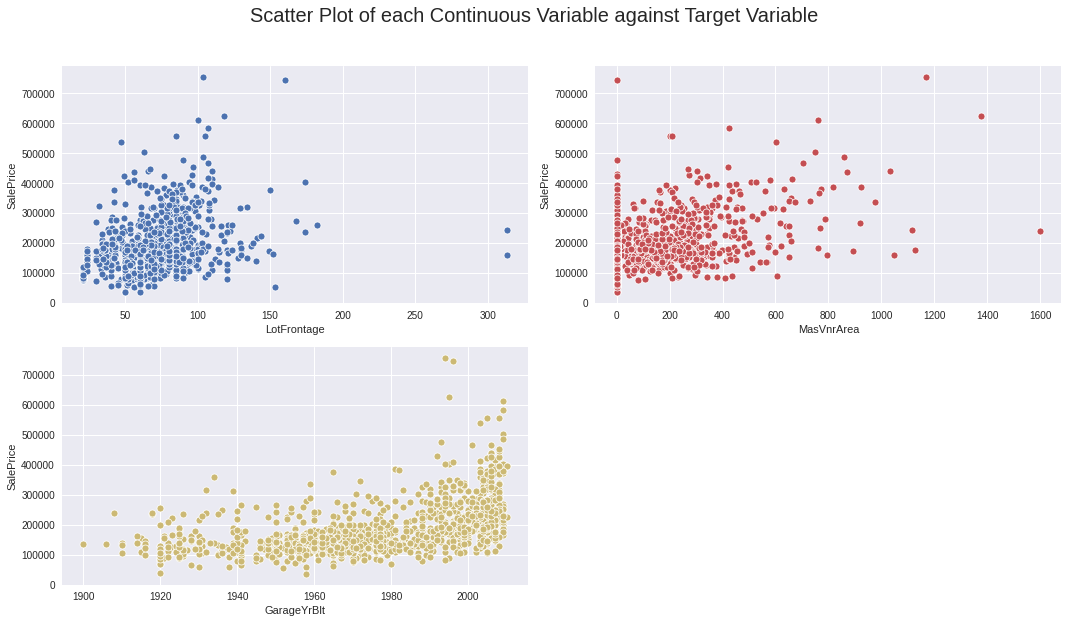

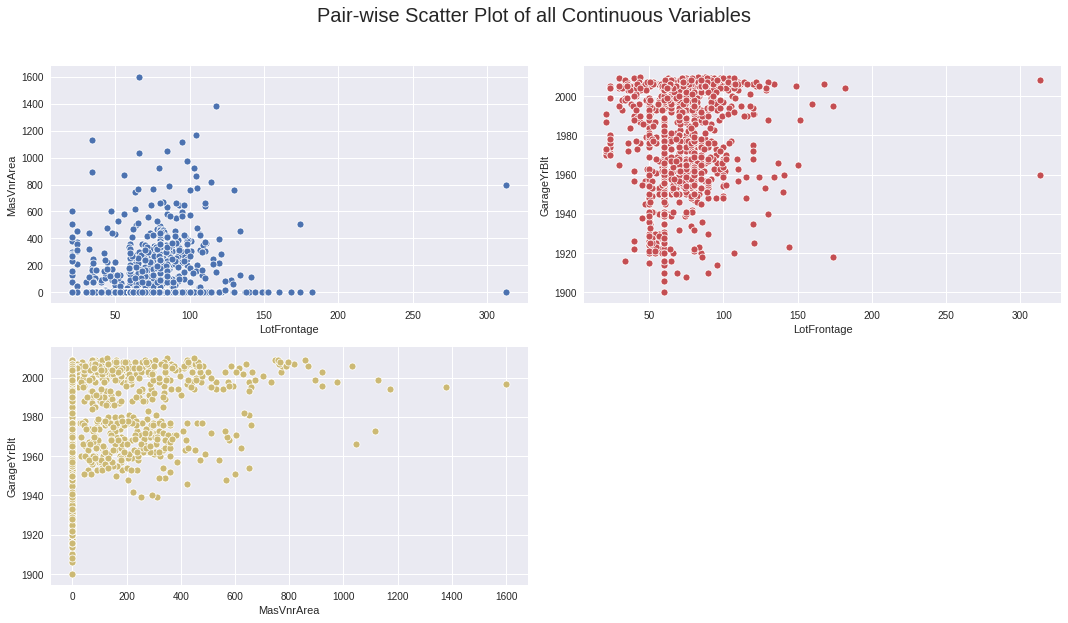

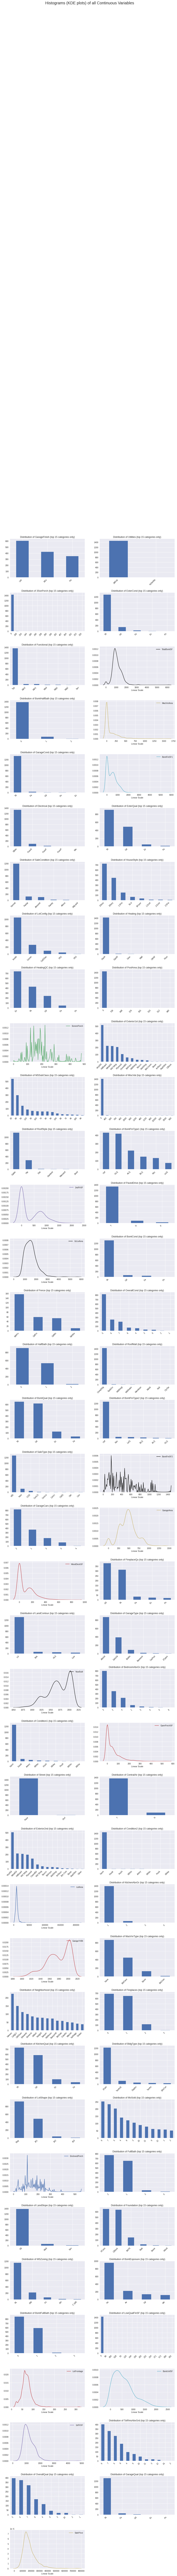

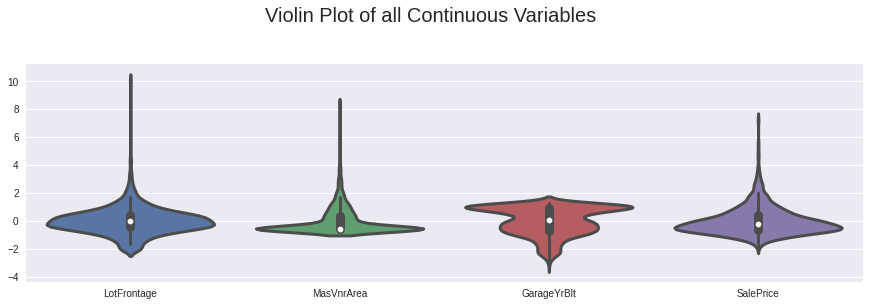

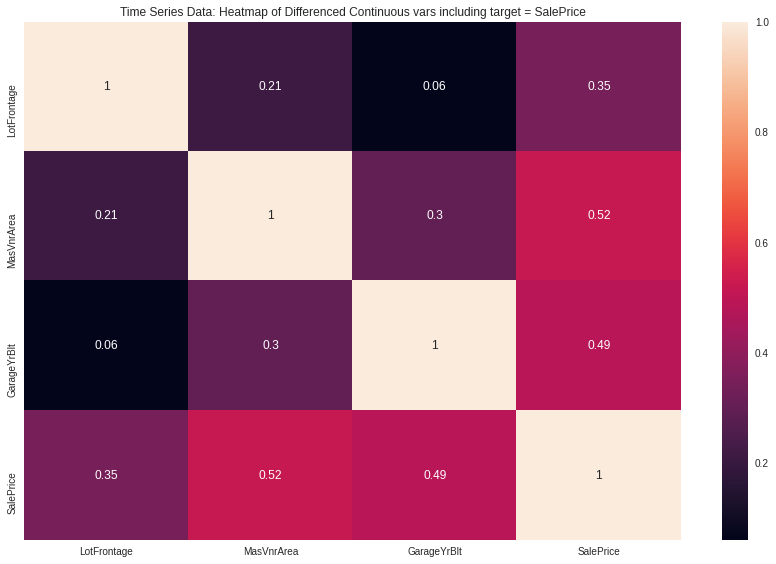

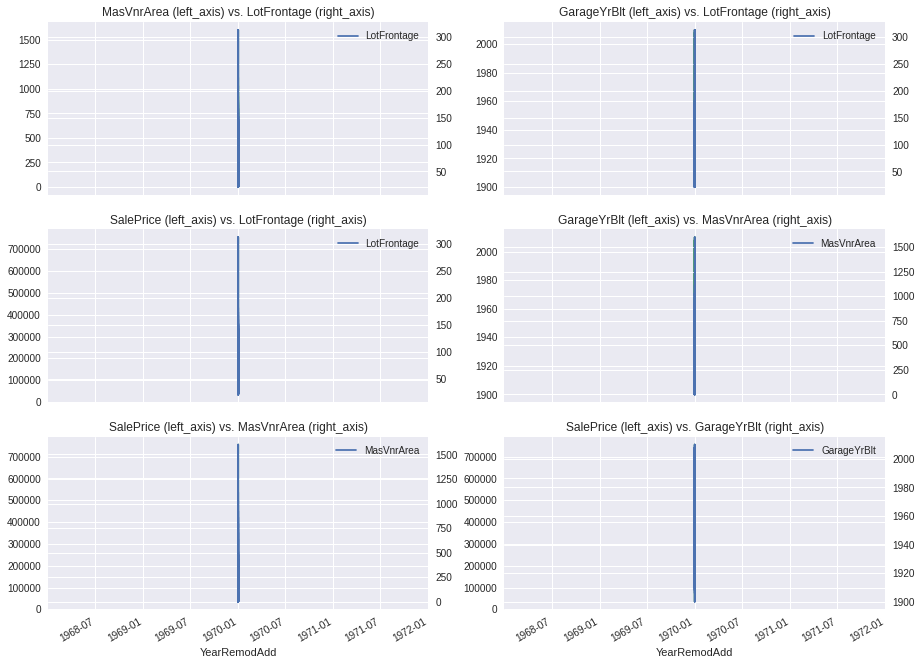

In [39]:
dft = AV.AutoViz(datapath+filename, sep=sep, depVar=target, dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=1500,max_cols_analyzed=30)

## 8. Numerizer

Numerizer is a Python module for converting natural language numbers into ints and floats. It is a port of the Ruby gem numerizer. This could be really useful when preprocessing text data.

In [40]:
!pip install numerizer

In [41]:
from numerizer import numerize

In [42]:
numerize('forty-two')

'42'

In [43]:
numerize('four hundred and sixty two')

'462'

In [44]:
numerize('twenty one thousand four hundred and seventy three')

'21473'

In [45]:
numerize('one billion and one')

'1000000001'

In [46]:
numerize('nine and three quarters')

'9.75'

In [47]:
numerize('platform nine and three quarters')

'platform 9.75'

## 9. ppscore


ppscorebrought to you by the makers of Bamboolib, is a Python implementation of the Predictive Power Score (PPS). The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix).

Let us see it demo through the Titanic Dataset

In [48]:
!pip install ppscore

  Using cached https://files.pythonhosted.org/packages/a1/c6/9ac4ae44c24c787a1738e5fb34dd987ada6533de5905a041aa6d5bea4553/pandas-1.1.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.1 which is incompatible.
  Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1


In [50]:
import ppscore as pps

def heatmap(df):
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax


def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title('Correlation matrix')
    return ax

### 9.1 Single Predictive Power Score
How well can Sex predict the Survival probability?

In [51]:
titanic_df_subset = titanic_df[["Survived", "Pclass", "Sex", "Age", "Ticket", "Fare", "Embarked"]]
pps.score(titanic_df_subset, "Sex", "Survived")

{'baseline_score': 0.3838383838383838,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'model_score': 0.33424786369677695,
 'ppscore': 0.12919635510576521,
 'x': 'Sex',
 'y': 'Survived'}

### 9.2 PPS matrix

which predictive patterns exist between the columns?

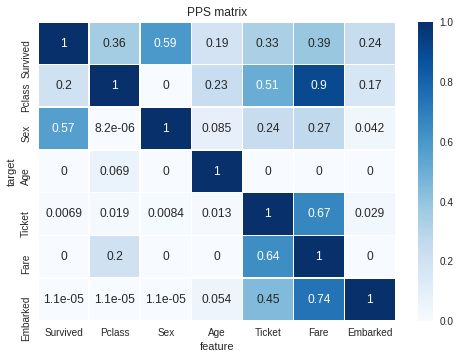

In [ ]:
matrix = pps.matrix(titanic_df_subset)
heatmap(matrix)

Let's compare the PPS matrix to the basic correlation matrix

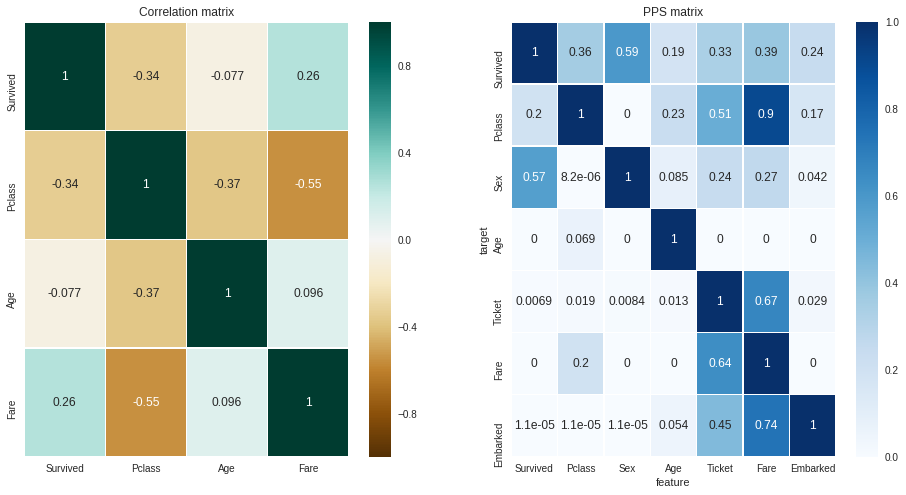

In [ ]:
# Correlation Matrix
f = plt.figure(figsize=(16,8))
f.add_subplot(1,2, 1)
corr_heatmap(titanic_df_subset.corr())

f.add_subplot(1,2, 2)
matrix = pps.matrix(titanic_df_subset)
heatmap(matrix)

These were some of the interesting and  useful python libraries for data science, that I have come across recently. In case you know about others which can be added to the list, do mention them in the comments below. 